<a href="https://colab.research.google.com/github/vkjadon/tf/blob/main/tf203-dogsvscats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import os

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [57]:
!pwd

/content


In [58]:
!ls

drive  sample_data


In [59]:
data_dir = 'drive/MyDrive/datasets/dog-vs-cat/train/'

In [60]:
!pwd

/content


In [61]:
os.listdir(data_dir)

['dog', 'cat']

In [ ]:
os.listdir(os.path.join(data_dir,'cat'))

In [63]:
for image_class in os.listdir(data_dir):
  print("Class - ", image_class)
  i=0
  for image in os.listdir(os.path.join(data_dir, image_class)):
    i=i+1
  print(i)


Class -  dog
500
Class -  cat
501


##Assign class path (we can aslo use `cd`)
The below method will store the path in `image_path`. Can aslo directly do by storing the string in the variable as we did for `data_dir`.

In [64]:
image_path=os.path.join(data_dir, 'cat')
print(type(image_path))
print(image_path)

<class 'str'>
drive/MyDrive/datasets/dog-vs-cat/train/cat


##Show list in the files in the above directory

In [65]:
image_list=os.listdir(image_path)
print(image_list)

['cat.10018.jpg', 'cat.10030.jpg', 'cat.10025.jpg', 'cat.1007.jpg', 'cat.1010.jpg', 'cat.10146.jpg', 'cat.10151.jpg', 'cat.10144.jpg', 'cat.10152.jpg', 'cat.10150.jpg', 'cat.1013.jpg', 'cat.10145.jpg', 'cat.1012.jpg', 'cat.10193.jpg', 'cat.10179.jpg', 'cat.10178.jpg', 'cat.10191.jpg', 'cat.10187.jpg', 'cat.10233.jpg', 'cat.10232.jpg', 'cat.10344.jpg', 'cat.10346.jpg', 'cat.10350.jpg', 'cat.10352.jpg', 'cat.10391.jpg', 'cat.1038.jpg', 'cat.10385.jpg', 'cat.10421.jpg', 'cat.10436.jpg', 'cat.10554.jpg', 'cat.10596.jpg', 'cat.10555.jpg', 'cat.10568.jpg', 'cat.10582.jpg', 'cat.10597.jpg', 'cat.10608.jpg', 'cat.10634.jpg', 'cat.10620.jpg', 'cat.10637.jpg', 'cat.10623.jpg', 'cat.10757.jpg', 'cat.10805.jpg', 'cat.10781.jpg', 'cat.10795.jpg', 'cat.10839.jpg', 'cat.10807.jpg', 'cat.10813.jpg', 'cat.10959.jpg', 'cat.10964.jpg', 'cat.10970.jpg', 'cat.11070.jpg', 'cat.11059.jpg', 'cat.11058.jpg', 'cat.11066.jpg', 'cat.11064.jpg', 'cat.11105.jpg', 'cat.11111.jpg', 'cat.11104.jpg', 'cat.11138.jpg', '

In [31]:
import random

In [66]:
random_image=random.choice(os.listdir(image_path))
print(random_image)
print(type(random_image))

cat.8235.jpg
<class 'str'>


In [52]:
from matplotlib import pyplot as plt

##Load Data
Generates a `tf.data.Dataset` from image files in a directory. It is loaded in the memory and is used as and when desired.   
In other word, the following command will build us the data pipeline.


In [102]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 1001 files belonging to 2 classes.


In [75]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

To use the data output from the data generator we have to use the iterator. This allows us to access the generated data pipeline. Also, we can grab the consecutive batches using the `next` method.

In [103]:
data_iterator = data.as_numpy_iterator()

In [104]:
data_iterator

`next()` method is used to grab the data from input pipeline

In [105]:
data_batch = data_iterator.next()

In [126]:
print(type(data_batch))
print(type(data_batch[0]))
print(type(data_batch[1]))
print(len(data_batch))
print(data_batch[0].shape)
#print(data_batch[0])
#print(data_batch[1])
#print(data_batch[0][0])
#print(data_batch)

<class 'tuple'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
2
(32, 256, 256, 3)


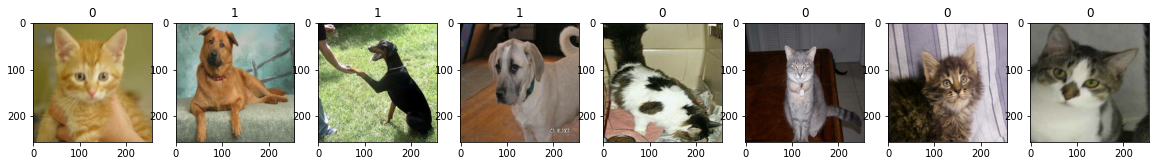

In [119]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(data_batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(data_batch[1][idx])

##Setting Parameters as Required

In [ ]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)